<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [4]:
library(tidyverse)

# loads experimental branch of statistical rethinking pkg
library(rethinking)

$-\sum_i p_i log p_i$ 

$lppd(y,\theta) = \sum_i log \frac{1}{S} \sum_s(y_i|\theta_s)$ 

$dX_t = k(\mu - X_t)dt + \sigma dW_t$

$D_{KL} = \sum_i {p_i} (log(p_i) - log(q_i))$ 


$\text{WAIC}(y,\theta) = -2(lppd - \sum_i var_{\theta} log p(y_i|\theta))$

<br> penalty has less to do with the number of parameters than with how the parameters are related to one another. When we get to multilevel models, adding parameters to the model can actually reduce the “effective number of parameters.” 

**<span style='background-color: lightgreen'>information entropy</span> is just the logarithm of the number of ways to realize a distribution**

* Information entropy is maximized when the  distribution is flat and flatter  distributions have higher entropy.

The principle of maximum entropy applies this measure of uncertainty to the problem of choosing among probability distributions. Perhaps the simplest way to state the maximum entropy principle is: 
> The distribution that can happen the most ways is also the distribution with the biggest information entropy. The distribution with the biggest entropy is the most conservative distribution that obeys its constraints.

the maximum entropy problem so amazing  nothing is just a special case of this  larger inference framework and I'm not  saying that then we're gonna do it this  way it's just that you want to  understand that 

> what you're doing when you solve for the posterior distribution is you're getting the distribution that is as flat as possible and consistent with the data 

**<font color = 'purple' style='background-color: lightyellow'>that's what  the posterior distribution that Bayesian  inference gives you is </font>**
> it's the flattest  distribution possible consistent with  the constraints and the data 

> no other  distribution could be flatter and still  be consistent with that information that  you put into it. 

**<font color = 'purple' style='background-color: lightyellow'>so it's the highest  entropy answer and why is that good</font>**

that means  your distance to the truth is smaller!

one way to think about this though is  that this is deflationary there's  nothing magic about statistics it's  saying well junk that can happen lots of  ways we're gonna bet on that

$ 
\begin{align*}  
y_i &\sim \text{Binomial}(n,p_i) \\ 
logit(p_i) &= \alpha + \beta x_i \\ 
logit(p_i) &= log \frac{p_i}{1-p_i} = \alpha + \beta x_i \\ 
\text{Solve for} \;  p_i \\ 
p_i &= \frac{exp(\alpha + \beta x_i)}{1 + exp(\alpha + \beta x_i)} 
\end{align*}  
$ 


In [5]:
## R code 11.1
library(rethinking)
data(chimpanzees)
d <- chimpanzees

## R code 11.2
d$treatment <- 1 + d$prosoc_left + 2*d$condition

## R code 11.3
xtabs( ~ treatment + prosoc_left + condition , d )

, , condition = 0

         prosoc_left
treatment   0   1
        1 126   0
        2   0 126
        3   0   0
        4   0   0

, , condition = 1

         prosoc_left
treatment   0   1
        1   0   0
        2   0   0
        3 126   0
        4   0 126


In [17]:
## R code 11.9
m11.3 <- quap(
    alist(
        pulled_left ~ dbinom( 1 , p ) ,
        logit(p) <- a + b[treatment] ,
        a ~ dnorm( 0 , 1.5 ),
        b[treatment] ~ dnorm( 0 , 1.5 )
    ) , data=d )
set.seed(1999)
prior <- extract.prior( m11.3 , n=1e4 )
p <- sapply( 1:4 , function(k) inv_logit( prior$a + prior$b[,k] ) )
mean( abs( p[,1] - p[,2] ) )

[1] 0.256328

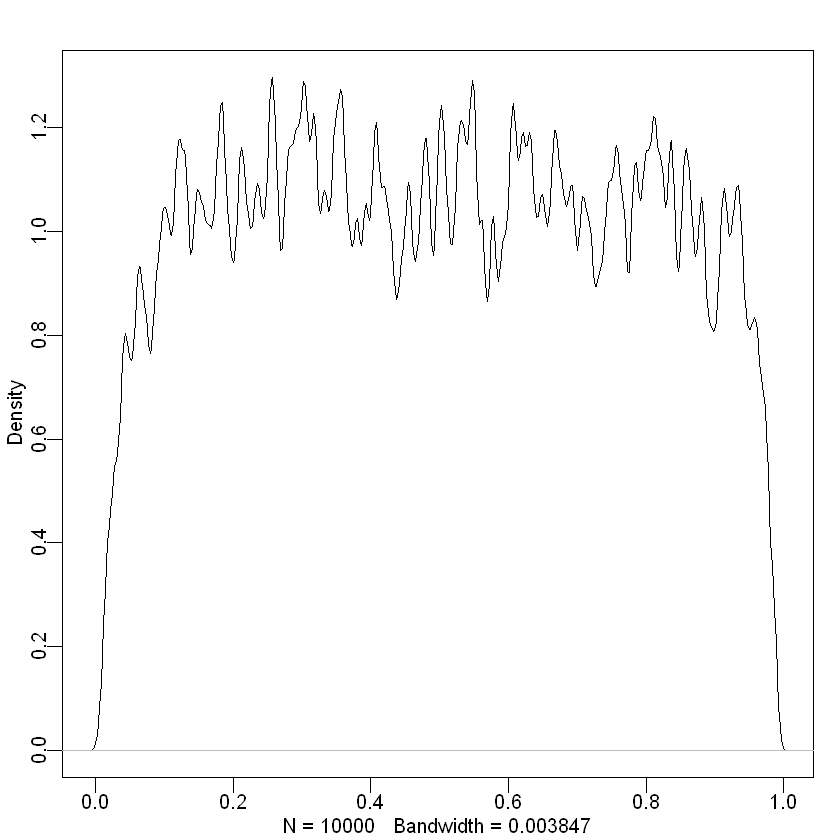

In [7]:
## R code 11.6
p <- inv_logit( prior$a )
dens( p , adj=0.1 )

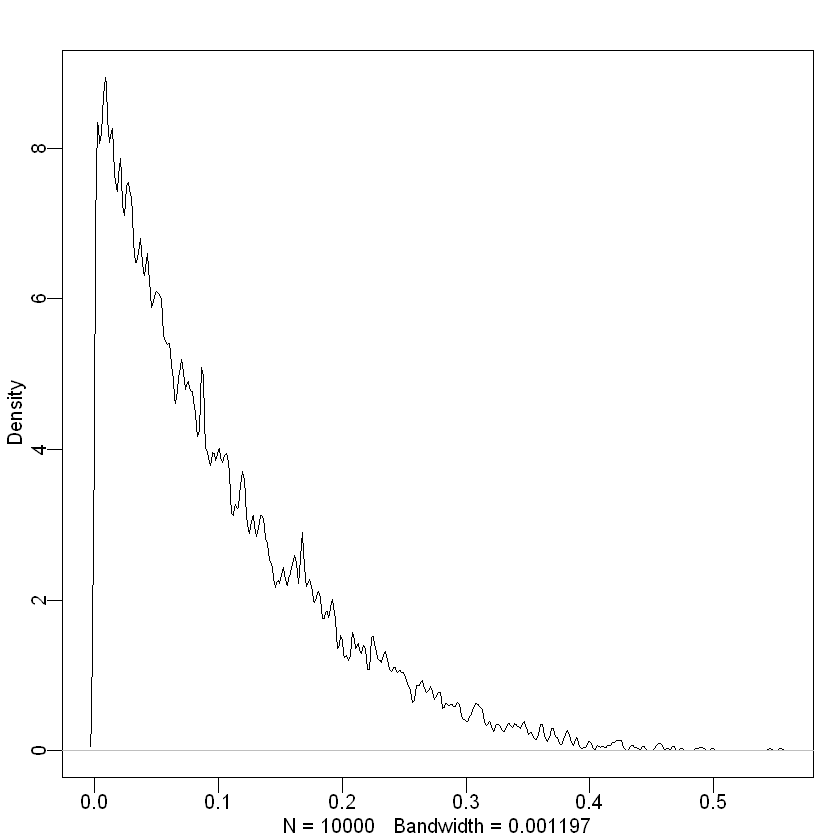

In [10]:
## R code 11.8
dens( abs( p[,1] - p[,2] ) , adj=0.1 ) # prior for difference in treatments

$ 
\begin{align*}  
y_i &\sim \text{Binomial}(N_i,p_i) \\ 
logit(p_i) &= \alpha + \beta x_i \\ 
logit(p_i) &= log \frac{p_i}{1-p_i} = \alpha + \beta x_i \\ 
\text{Solve for} \;  p_i \\ 
p_i &= \frac{exp(\alpha + \beta x_i)}{1 + exp(\alpha + \beta x_i)} 
\end{align*}  
$ 
